4


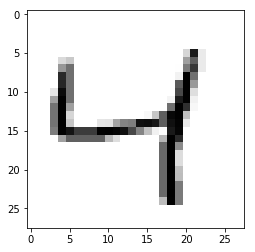

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

image_index = 2
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4934 - acc: 0.8748
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3067 - acc: 0.9157
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2857 - acc: 0.9212
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2749 - acc: 0.9235
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2685 - acc: 0.9259
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2631 - acc: 0.9279
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2587 - acc: 0.9290
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2556 - acc: 0.9296
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2529 - acc: 0.9310
Epoch 10/1

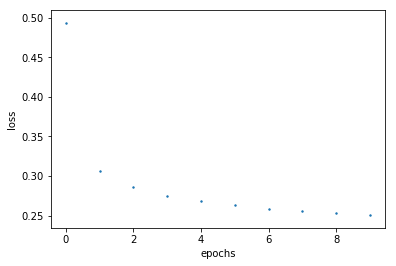

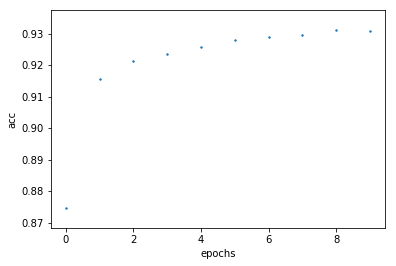

10000/10000 [==============================] - 0s 30us/sample - loss: 0.2604 - acc: 0.9284
loss=0.26041345736682414, accuracy=0.9283999800682068


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])

history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10)

for key in history.history.keys():
    values = history.history[key]
    plt.scatter(range(len(values)), values, s=2)
    plt.ylabel(key)
    plt.xlabel('epochs')
    plt.show()
    
(loss, accuracy) = model.evaluate(x_test, y_test)

print(f'loss={loss}, accuracy={accuracy}')

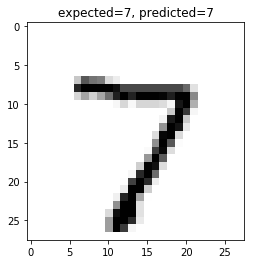

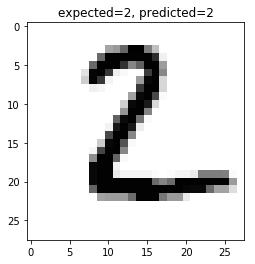

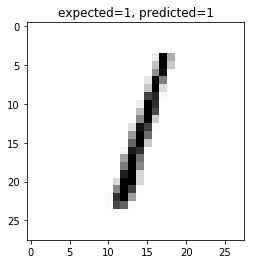

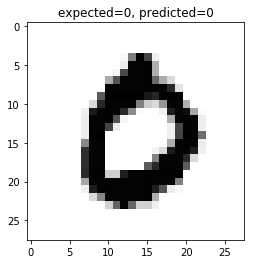

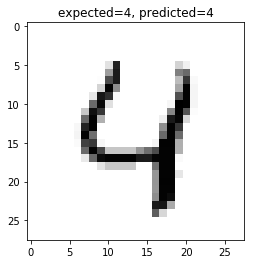

In [3]:
import numpy as np
for i in range(5):
    expected = y_test[i]
    predicted = np.argmax(model.predict(x=np.expand_dims(x_test[i], axis=0)))
    plt.figure()
    plt.title(f'expected={expected}, predicted={predicted}')
    plt.imshow(x_test[i], cmap='Greys')